In [22]:
# Installing requirements
%pip install numpy pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importing data
mnist_data = np.array(pd.read_csv('dataset/handwritten_numbers.csv'))

In [3]:
# Getting data's shape
m, n = mnist_data.shape

# Shuffling data
np.random.shuffle(mnist_data)

# Separating test data (10% of total)
test_data = mnist_data[:4200].T
Y_test = test_data[0]
X_test = test_data[1:n]

# Separating training data
train_data = mnist_data[4200:m].T
Y_train = train_data[0]
X_train = train_data[1:n]

In [4]:
# Normalizing data
X_test = X_test / 255
X_train = X_train / 255

In [5]:
# Defining activation functions


# ReLU activation function
def relu(Z):
    return np.maximum(0, Z)


# Derivative of ReLU
def d_relu_dx(Z):
    return Z > 0


# Softmax
def softmax(Z):
    return np.exp(Z) / np.sum(np.exp(Z), axis=0)

In [11]:
# Neural net class
class MnistNeuralNet:
    def __init__(self, X: np.ndarray, Y: np.ndarray, alpha: float) -> None:
        # Data for neural net
        self.X = X
        self.Y = Y

        # Learning rate
        self.alpha = alpha

    def init_params(self) -> None:
        # First layers weights and biases
        self.W1 = np.random.rand(10, 784) - 0.5
        self.b1 = np.random.rand(10, 1) - 0.5

        # Second layers weights and biases
        self.W2 = np.random.rand(10, 10) - 0.5
        self.b2 = np.random.rand(10, 1) - 0.5

    def forward_propagation(self, X: np.ndarray = None) -> None:
        # Setting what data to predict on (for training / predicting)
        X_data: np.ndarray = self.X if X is None else X

        # First layer nerons output and activation
        self.Z1 = self.W1.dot(X_data) + self.b1
        self.A1 = relu(self.Z1)

        # Second layer nerons output and activation
        self.Z2 = self.W2.dot(self.A1) + self.b2
        self.A2 = softmax(self.Z2)

    def back_propagation(self) -> list[np.ndarray]:
        # Creating one hot encoded array
        one_hot_Y = self.one_hot()

        # Derivative of last layer neurons, weights and biases
        dZ2 = (1 / m) * (self.A2 - one_hot_Y)
        dW2 = dZ2.dot(self.A1.T)
        db2 = np.sum(dZ2, axis=1).reshape(-1, 1)

        # Derivative of first layer neurons, weights and biases
        dZ1 = self.W2.T.dot(dZ2) * d_relu_dx(self.Z1)
        dW1 = dZ1.dot(self.X.T)
        db1 = np.sum(dZ1, axis=1).reshape(-1, 1)

        # Returning derivative values
        return dW1, db1, dW2, db2

    def update_params(
        self, dW1: np.ndarray, db1: np.ndarray, dW2: np.ndarray, db2: np.ndarray
    ) -> None:
        # Updating all weights and biases
        self.W1 -= self.alpha * dW1
        self.b1 -= self.alpha * db1
        self.W2 -= self.alpha * dW2
        self.b2 -= self.alpha * db2

    def gradient_descent(self, epochs: int) -> None:
        # Repeating process over a number of epochs
        for i in range(epochs):
            # Doing forward propagation
            self.forward_propagation()

            # Obtaining derivatives
            dW1, db1, dW2, db2 = self.back_propagation()

            self.update_params(dW1, db1, dW2, db2)

            # Showing progress and accuracy every 50 iterations
            if i % 50 == 0:
                print('Iteration: ', i)
                predictions = self.get_predictions()
                print(self.get_accuracy(predictions))

    def one_hot(self) -> np.ndarray:
        # Turning Y values into int
        temp_Y = self.Y.astype(int)

        # Creating empty array
        one_hot_Y = np.zeros((temp_Y.size, temp_Y.max() + 1))

        # Turning value at each max to 1
        one_hot_Y[np.arange(temp_Y.size), temp_Y] = 1

        return one_hot_Y.T

    def get_predictions(self) -> np.ndarray:
        # Returns the maximum value in output array or 0
        return np.argmax(self.A2, 0)

    def get_accuracy(self, predictions) -> np.ndarray:
        # Returns number of correct predictions over array's size
        return np.sum(predictions == self.Y) / self.Y.size

    def make_predictions(self, X) -> np.ndarray:
        # Doing forward propagation for given data
        self.forward_propagation(X)

        # Returning predictions
        predictions = self.get_predictions()
        return predictions

    def test_prediction(self, index: int) -> None:
        # Getting image that is being predicted on
        current_image = X_test[:, index, None]

        # Getting prediction
        prediction = self.make_predictions(X_test[:, index, None])

        # Getting correct label
        label = Y_test[index]

        # Printing and showing image
        print('Prediction: ', prediction)
        print('Label: ', label)

        current_image = current_image.reshape(28, 28)
        plt.imshow(current_image, cmap='gray')
        plt.axis('off')
        plt.show()

In [12]:
# Instantiating class
neural_net = MnistNeuralNet(X=X_train, Y=Y_train, alpha=0.1)

# Initializing parameters
neural_net.init_params()

# Training model
neural_net.gradient_descent(500)

Iteration:  0
0.1041005291005291
Iteration:  50
0.36873015873015874
Iteration:  100
0.5966137566137566
Iteration:  150
0.686005291005291
Iteration:  200
0.7369576719576719
Iteration:  250
0.7705291005291005
Iteration:  300
0.7935449735449736
Iteration:  350
0.8103968253968254
Iteration:  400
0.8230687830687831
Iteration:  450
0.8312962962962963


Prediction:  [9]
Label:  9


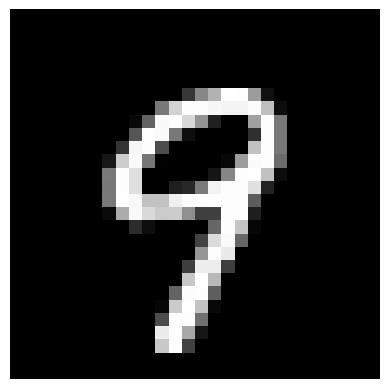

In [21]:
# Getting data's shape
a, b = X_test.shape

# Making predictions
neural_net.test_prediction(np.random.randint(1, b))